# Übung 2: Hauptkomponentenanalyse

## 1. Implementierung der Hauptkomponentenanalyse

In [1]:
import pandas as pd
import numpy as np
import numpy.testing as npt
import json
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

np.set_printoptions(suppress=True, linewidth=np.inf)

%reload_ext version_information
%version_information numpy, pandas, json, zipfile, plt, seaborn, matplotlib

Software,Version
Python,3.7.4 64bit [GCC 7.3.0]
IPython,7.8.0
OS,Linux 4.15.0 66 generic x86_64 with debian buster sid
numpy,1.17.2
pandas,0.25.1
json,2.0.9
zipfile,The 'zipfile' distribution was not found and is required by the application
plt,The 'plt' distribution was not found and is required by the application
seaborn,0.9.0
matplotlib,3.1.1


In [2]:
'''
Attribute Information:
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's
'''

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'TGT']
boston = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols[0:13], index_col=False)
boston_full = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols, index_col=False)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [3]:
def pca(data, r, whiten=True):
    n, d = data.shape
    
    if whiten:
        # Center
        data = data - data.mean(axis=0)
        npt.assert_almost_equal(data[:, 0].mean(), 0.0, decimal=10)

        # Normalize
        data = data / data.std(axis=0)
        npt.assert_almost_equal(data[:, 0].var(), 1.0, decimal=10)
    
    U, S, VT = np.linalg.svd(data)
    
    data_whitened = data
    eigen_values = S[:r]**2 / (d - 1)
    eigen_vectors = VT
    principal_components = VT.T[:, :r]
    projected_data = (U[:, :r] @ np.diag(S[:r]))
    
    return data_whitened, eigen_values, principal_components, projected_data, eigen_vectors

### PCA Boston Housing-Test

In [4]:
boston_array = np.asarray(boston)
data_whitened, eigen_values, principal_components, projected_data, eigen_vectors = pca(boston_array, len(boston_array.T))
eigen_values_df = pd.DataFrame(columns=["Eigenwerte", "Anteilige Varianz", "Anteilige Varianz(in Prozent)", "Kumulative Varianz", "Kumulative Varianz(in Prozent)"])
eigen_values_df.iloc[:, 0] = eigen_values
eigen_values_df.iloc[:, 1] = np.var(projected_data, axis=0) / np.var(projected_data, axis=0).sum()
eigen_values_df.iloc[:, 2] = (np.var(projected_data, axis=0) / np.var(projected_data, axis=0).sum()) * 100
eigen_values_df.iloc[:, 3] = np.cumsum(eigen_values_df.iloc[:, 1])
eigen_values_df.iloc[:, 4] = np.cumsum(eigen_values_df.iloc[:, 1]) * 100
eigen_values_df

,Eigenwerte,Anteilige Varianz,Anteilige Varianz(in Prozent),Kumulative Varianz,Kumulative Varianz(in Prozent)
0,258.348792,0.471296,47.129606,0.471296,47.129606
1,60.436434,0.110252,11.025193,0.581548,58.154800
2,52.397003,0.095586,9.558590,0.677134,67.713389
3,36.161084,0.065967,6.596732,0.743101,74.310121
4,35.201405,0.064217,6.421661,0.807318,80.731782
5,27.720669,0.050570,5.056978,0.857888,85.788760
6,22.574182,0.041181,4.118124,0.899069,89.906884
7,16.702103,0.030469,3.046902,0.929538,92.953786
8,11.677777,0.021303,2.130333,0.950841,95.084120
9,9.286695,0.016941,1.694137,0.967783,96.778257


#### Warum: Singulärwerte**2 / (n - 1) = Eigenwerte?

##### A:

#### Wieviele Dimensionen werden benötigt bei 10%, 5%, 1% Fehler.

In [5]:
tol1, tol2, tol3 = 0.1, 0.05, 0.01
print("Mit {}% zulässigem Fehler bei der Dimensionsreduktion reichen  {} Dimensionen aus.".format(tol1 * 100, eigen_values_df[(eigen_values_df.iloc[:, 3]  - (1 - tol1)) >= 0]["Kumulative Varianz"].idxmin() + 1))
print("Mit  {}% zulässigem Fehler bei der Dimensionsreduktion reichen  {} Dimensionen aus.".format(tol2 * 100, eigen_values_df[(eigen_values_df.iloc[:, 3]  - (1 - tol2)) >= 0]["Kumulative Varianz"].idxmin() + 1))
print("Mit  {}% zulässigem Fehler bei der Dimensionsreduktion reichen {} Dimensionen aus.".format(tol3 * 100, eigen_values_df[(eigen_values_df.iloc[:, 3]  - (1 - tol3)) >= 0]["Kumulative Varianz"].idxmin() + 1))

Mit 10.0% zulässigem Fehler bei der Dimensionsreduktion reichen  8 Dimensionen aus.
Mit  5.0% zulässigem Fehler bei der Dimensionsreduktion reichen  9 Dimensionen aus.
Mit  1.0% zulässigem Fehler bei der Dimensionsreduktion reichen 12 Dimensionen aus.


In [6]:
projected_data_df = pd.DataFrame(projected_data)
merged_df = pd.concat([pd.DataFrame(projected_data[:, :3]), boston_full], axis=1, sort="False")
corr = merged_df.corr()[:3]
cmap = cm.get_cmap('Greens', 256)
corr.style.background_gradient(cmap=cmap, axis=None).set_precision(2)

,0,1,2,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,1,6.7e-17,-3e-17,0.62,-0.63,0.86,0.012,0.85,-0.47,0.78,-0.8,0.79,0.84,0.51,-0.5,0.77,-0.61
1,6.7e-17,1,-4.6e-16,-0.38,-0.39,0.13,0.54,0.26,0.18,0.37,-0.42,-0.33,-0.29,-0.37,0.29,-0.089,0.29
2,-3e-17,-4.6e-16,1,0.27,0.33,-0.018,0.32,0.13,0.66,-0.02,-0.055,0.32,0.25,-0.36,-0.33,-0.3,0.42


#### Interpretation:

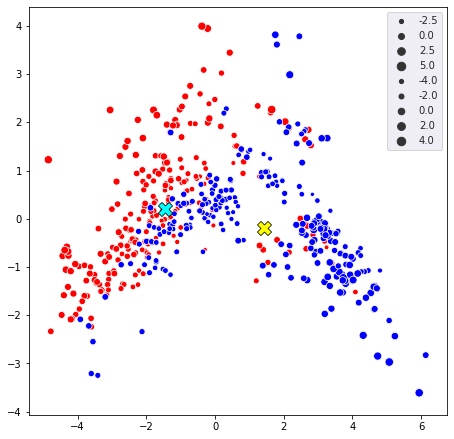

In [7]:
fig, axes = plt.subplots(1,1, figsize=(7.5, 7.5))
sns.set_style("dark")
tgt_median = np.median(boston_full['TGT'])
tgt_low = projected_data[boston_full['TGT'] <= tgt_median]
tgt_high = projected_data[boston_full['TGT'] > tgt_median]

x_low, y_low = np.mean(tgt_low[:, 0]), np.mean(tgt_low[:, 1])
x_high, y_high = np.mean(tgt_high[:, 0]), np.mean(tgt_high[:, 1])

sns.scatterplot(tgt_high[:, 0], tgt_high[:, 1], size=tgt_high[:, 2], color="red", ax=axes)
sns.scatterplot(tgt_low[:, 0], tgt_low[:, 1], size=tgt_low[:, 2], color="blue", ax=axes)
sns.scatterplot([x_low], [y_low], color="yellow", s=200, marker="X", edgecolor='k', ax=axes)
sns.scatterplot([x_high], [y_high], color="cyan", s=200, marker="X", edgecolor='k', ax=axes)

## 2. Eigengesichter

In [8]:
import pandas as pd
import numpy as np
import tarfile, requests, wget
import os
import skimage as ski
from sklearn.decomposition import PCA
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from random import randrange

np.set_printoptions(suppress=True, linewidth=np.inf)

!pip install version_information
%reload_ext version_information
%version_information numpy, pandas, tarfile, requests, wget, os, skimage, matplotlib, random

Software,Version
Python,3.7.4 64bit [GCC 7.3.0]
IPython,7.8.0
OS,Linux 4.15.0 66 generic x86_64 with debian buster sid
numpy,1.17.2
pandas,0.25.1
tarfile,The 'tarfile' distribution was not found and is required by the application
requests,2.22.0
wget,3.2
os,The 'os' distribution was not found and is required by the application
skimage,0.15.0


In [9]:
filename = "lfw-funneled"
dirname = "lfw_funneled"
url = "http://vis-www.cs.umass.edu/lfw/"+filename+".tgz"
tar_file_name = "../data/"+filename+".tgz"
untar_file_name = "../data/"
wget.download(url, tar_file_name) if not os.path.isfile(tar_file_name) else print("File already downloaded.")
tarfile.open(tar_file_name, "r:gz").extractall(untar_file_name) if not os.path.isdir(untar_file_name+dirname) else print("File already extracted.")
scale_size = 32

File already downloaded.
File already extracted.


In [10]:
def process_img(img):
    # crop, scale, flatten
    y_l, y_u = 90, 185
    x_l, x_u = 80, 170
    img_cropped = img[y_l:y_u, x_l:x_u]
    img_scaled = ski.transform.resize(img_cropped, (scale_size, scale_size), anti_aliasing=True)
    img_flatten = img_scaled.flatten()
    return img_flatten

In [11]:
train = []
validate = []
for path, dirs, files in os.walk(untar_file_name):
    if len(files) >= 70:
        name = path.split("/")[-1]
        valid_index = randrange(0, len(files))
        for i in range(len(files)):
            if i == valid_index:
                continue
            img = ski.io.imread(os.path.join(path, files[i]), as_gray=True)
            img_processed = process_img(img)
            train.append(img_processed)
        img = ski.io.imread(os.path.join(path, files[valid_index]), as_gray=True)
        validate.append([process_img(img), name])

train = np.asarray(train)
validate = np.asarray(validate)

train.shape, validate.shape

((1281, 1024), (7, 2))

In [12]:
data_whitened, eigen_values, principal_components, projected_data, eigen_vectors = pca(train, len(train.T))
print(data_whitened.shape, eigen_values.shape, principal_components.shape, projected_data.shape, eigen_vectors.shape)
print(projected_data.var(axis=0))
print(eigen_values)

(1281, 1024) (1024,) (1024, 1024) (1281, 1024) (1024, 1024)
[293.38778695 163.52274736  51.06948335 ...   0.00005684   0.00005019   0.00004805]
[367.38001474 204.76308834  63.9491771  ...   0.00007118   0.00006285   0.00006017]


In [13]:
eigen_values_df = pd.DataFrame(columns=["Eigenwerte", "Anteilige Varianz", "Anteilige Varianz(in Prozent)", "Kumulative Varianz", "Kumulative Varianz(in Prozent)"])
eigen_values_df.iloc[:, 0] = eigen_values
eigen_values_df.iloc[:, 1] = np.var(projected_data, axis=0) / np.var(projected_data, axis=0).sum()
eigen_values_df.iloc[:, 2] = (np.var(projected_data, axis=0) / np.var(projected_data, axis=0).sum()) * 100
eigen_values_df.iloc[:, 3] = np.cumsum(eigen_values_df.iloc[:, 1])
eigen_values_df.iloc[:, 4] = np.cumsum(eigen_values_df.iloc[:, 1]) * 100
eigen_values_df

,Eigenwerte,Anteilige Varianz,Anteilige Varianz(in Prozent),Kumulative Varianz,Kumulative Varianz(in Prozent)
0,367.380015,2.865115e-01,28.651151,0.286512,28.651151
1,204.763088,1.596902e-01,15.969018,0.446202,44.620169
2,63.949177,4.987254e-02,4.987254,0.496074,49.607424
3,62.365250,4.863727e-02,4.863727,0.544712,54.471151
4,41.806051,3.260361e-02,3.260361,0.577315,57.731512
...,...,...,...,...,...
1019,0.000078,6.054559e-08,0.000006,1.000000,99.999979
1020,0.000075,5.863834e-08,0.000006,1.000000,99.999985
1021,0.000071,5.550885e-08,0.000006,1.000000,99.999990
1022,0.000063,4.901610e-08,0.000005,1.000000,99.999995


In [14]:
tol1, tol2, tol3 = 0.1, 0.05, 0.01
print("Mit {}% zulässigem Fehler bei der Dimensionsreduktion reichen  {} Dimensionen aus.".format(tol1 * 100, eigen_values_df[(eigen_values_df.iloc[:, 3]  - (1 - tol1)) >= 0]["Kumulative Varianz"].idxmin() + 1))
print("Mit  {}% zulässigem Fehler bei der Dimensionsreduktion reichen {} Dimensionen aus.".format(tol2 * 100, eigen_values_df[(eigen_values_df.iloc[:, 3]  - (1 - tol2)) >= 0]["Kumulative Varianz"].idxmin() + 1))
print("Mit  {}% zulässigem Fehler bei der Dimensionsreduktion reichen {} Dimensionen aus.".format(tol3 * 100, eigen_values_df[(eigen_values_df.iloc[:, 3]  - (1 - tol3)) >= 0]["Kumulative Varianz"].idxmin() + 1))

Mit 10.0% zulässigem Fehler bei der Dimensionsreduktion reichen  66 Dimensionen aus.
Mit  5.0% zulässigem Fehler bei der Dimensionsreduktion reichen 122 Dimensionen aus.
Mit  1.0% zulässigem Fehler bei der Dimensionsreduktion reichen 305 Dimensionen aus.


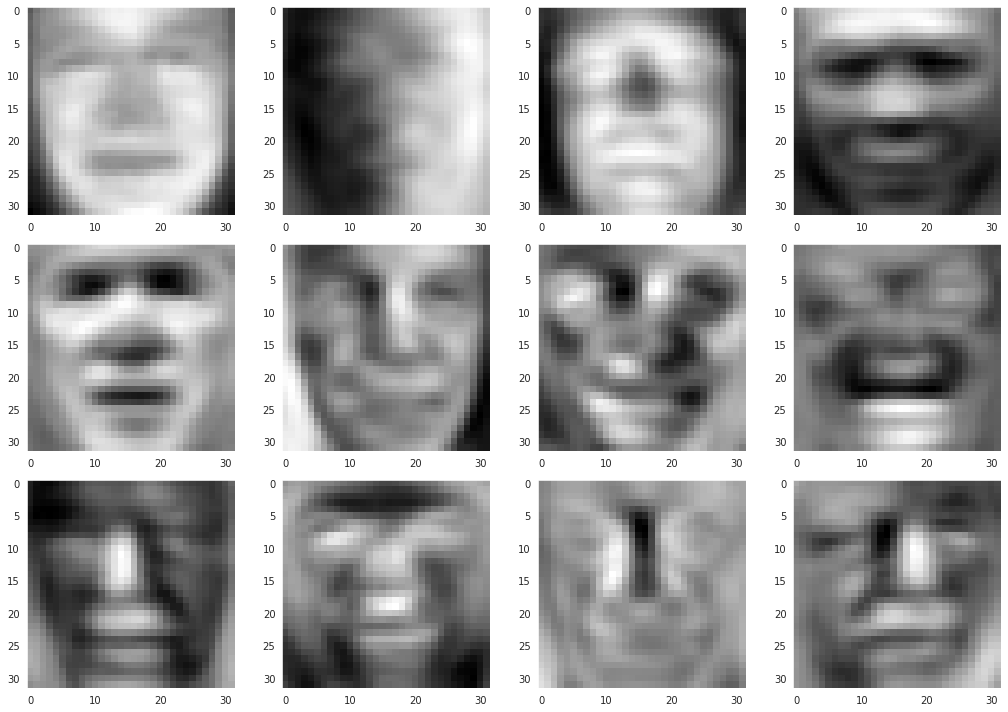

In [15]:
ncols, nrows = 4, 3
fig = plt.figure(figsize=(15,10))
spec = gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig)
for i in range(nrows):
    for j in range(ncols):
        ax = fig.add_subplot(spec[i, j])
        img = eigen_vectors[i * ncols + j].reshape(scale_size, scale_size)
        min_val = img.min()
        img -= min_val
        max_val = img.max()
        img *= (255 / max_val)
        img = np.asarray(img, dtype=np.uint8)
        ski.io.imshow(img, ax=ax, cmap="gray")

Minimal euclidian distance: 0.10016537996921689, Train image index: 1093
Minimal euclidian distance: 0.1076844602461909, Train image index: 1249
Minimal euclidian distance: 0.07844916111090094, Train image index: 408
Minimal euclidian distance: 0.12107515865318513, Train image index: 355
Minimal euclidian distance: 0.10345778328411191, Train image index: 967
Minimal euclidian distance: 0.09024071800153333, Train image index: 1038
Minimal euclidian distance: 0.11831351277769203, Train image index: 996
Sum of squared minimal euclidian distances: 0.07528749865808074


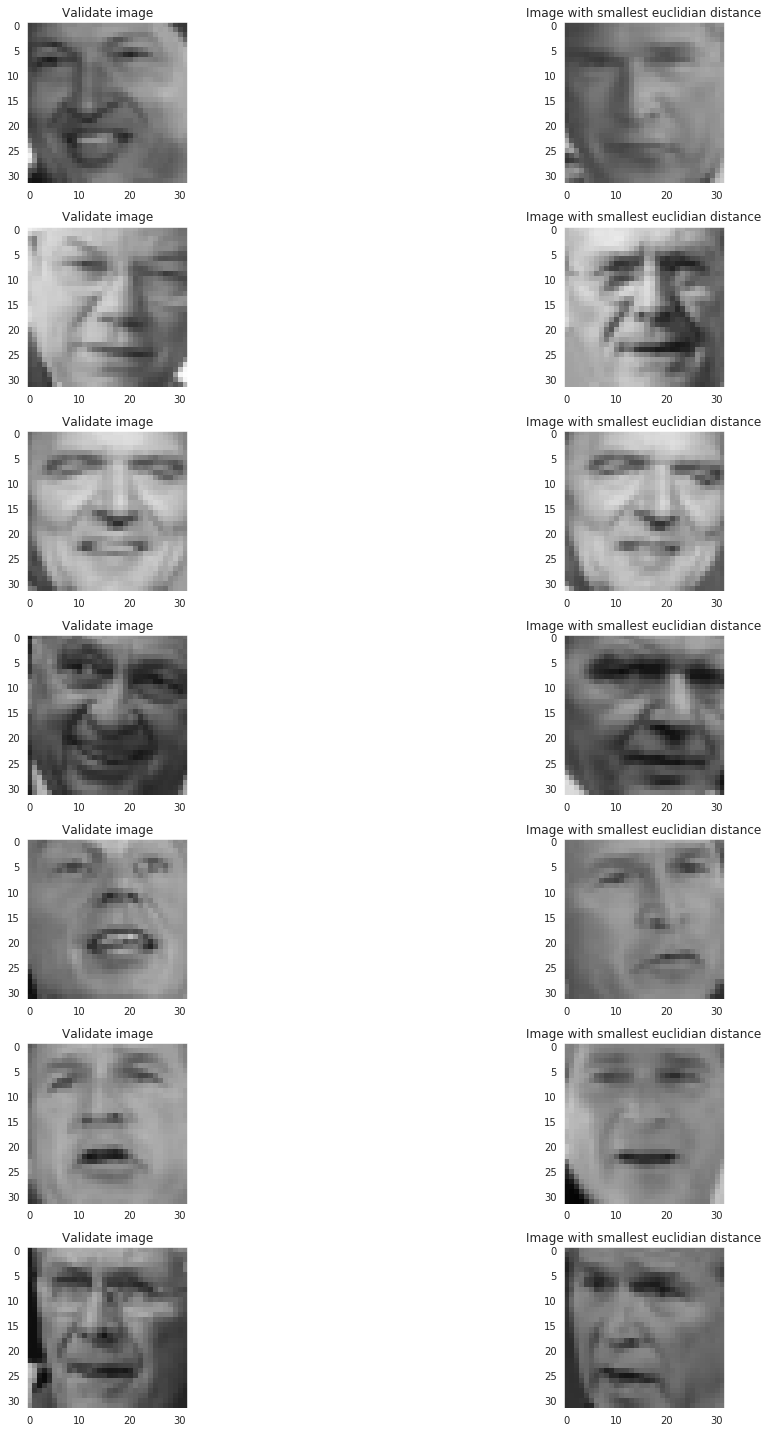

In [23]:
train = []
validate = []
for path, dirs, files in os.walk(untar_file_name):
    if len(files) >= 70:
        name = path.split("/")[-1]
        valid_index = randrange(0, len(files))
        for i in range(len(files)):
            if i == valid_index:
                continue
            img = ski.io.imread(os.path.join(path, files[i]), as_gray=True)
            img_processed = process_img(img)
            train.append(img_processed)
        img = ski.io.imread(os.path.join(path, files[valid_index]), as_gray=True)
        validate.append([process_img(img), name])

train = np.asarray(train)
validate = np.asarray(validate)

dim = 330
n_faces = 49
data_whitened, eigen_values, principal_components, projected_data, eigen_vectors = pca(train, dim)

train_m = train - train.mean(axis=0)
train_var = train_m / train_m.std(axis=0)
train_p = train_var @ eigen_vectors[:, :n_faces]

fig = plt.figure(figsize=(30,20))
spec = gridspec.GridSpec(ncols=2, nrows=7, figure=fig)
sum_val = 0
for i in range(7):
    validate_img_m = validate[i, 0] - train.mean(axis=0)
    validate_img_var = validate_img_m / train_m.std(axis=0)
    validate_img_p = validate_img_var @ eigen_vectors[:, :n_faces]

    min_index = 0
    min_val = np.inf
    for j in range(1281):
        min_tmp = np.linalg.norm(train_p[j] - validate_img_p) / n_faces
        if min_tmp < min_val:
            min_val = min_tmp
            min_index = j
    print("Minimal euclidian distance: {}, Train image index: {}".format(min_val, min_index))
    sum_val += min_val**2
    ax1 = fig.add_subplot(spec[i, 0])
    ax2 = fig.add_subplot(spec[i, 1])
    ax1.set_title("Validate image")
    ax2.set_title("Image with smallest euclidian distance")
    validate_img = validate[i, 0].reshape(scale_size, scale_size)
    train_img = train[min_index].reshape(scale_size, scale_size)
    ski.io.imshow(validate_img, cmap="gray", ax=ax1)
    ski.io.imshow(train_img, cmap="gray", ax=ax2)
print("Sum of squared minimal euclidian distances: {}".format(sum_val))